    # Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.delete_float_array.restype = None


In [3]:
X = np.array([
      [1, 1],
      # [1, 2],
      [2, 3],
      [3, 3]
], dtype=ctypes.c_float)
Y = np.array([
      [1,-1],
      # [1,-1],
      [-1,1],
      [-1,1]
],dtype=ctypes.c_float)

X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [4]:
X_to_predict = []

for i in range(1000) :
    x_1 = random.uniform(0,4)
    x_2 = random.uniform(0,4)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [5]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    2,  # number_of_classes : usize,
    0.5,  # gamma : f32,
    True,  # is_classification : bool,
    100,  # number_of_clusters : usize
    False, # is_naif
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 2,))
print(len(rbf_trained_model))

2000


In [6]:
X
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for i in range(0,len(rbf_trained_model),2) :
    if rbf_trained_model[i] < rbf_trained_model[i+1] :
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

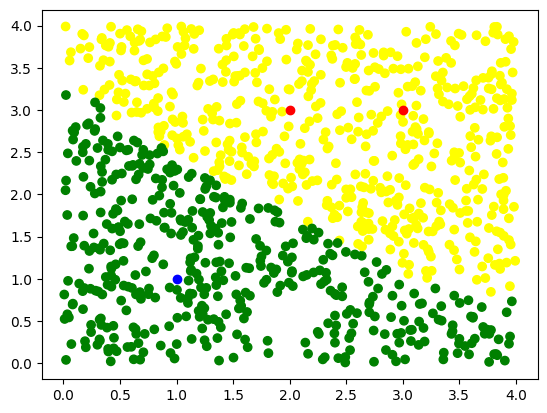

<Figure size 640x480 with 0 Axes>

In [7]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
#plt.scatter(predicted_x1, predicted_x2, c=predicted_labels_full)

plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

In [13]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.delete_float_array.restype = None


In [14]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])], dtype=ctypes.c_float)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0],dtype=ctypes.c_float)

In [15]:
X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

#print(Y)

In [16]:
X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(1.0, 3.0)
    x_2 = random.uniform(1.0, 3.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [17]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)

In [18]:
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,        # pointer_to_inputs_train : *mut f32,
    len(X),                  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,    # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),       # number_of_inputs_to_predict : usize,
    len(X[0]),               # dimension_of_inputs : usize,
    y_to_predict_ptr,        # pointer_to_labels : *mut f32,
    len(Y[0]),               # number_of_classes : usize,
    1,                       # gamma : f32,
    True,                    # is_classification : bool,
    100,                  # number_of_clusters : usize
    False,
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr,(len(X_to_predict)*len(Y[0]),))
print(len(rbf_trained_model))

1000


In [19]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in rbf_trained_model :
    if y < 0 :
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

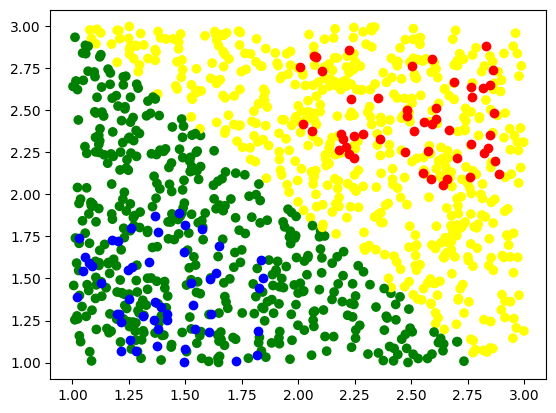

<Figure size 640x480 with 0 Axes>

In [20]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.delete_float_array.restype = None

In [3]:
X = np.array([[1, -1], [-1, 1], [-1, -1], [1, 1]],dtype=ctypes.c_float)
Y = np.array([1, 1, -1, -1],dtype=ctypes.c_float)

In [33]:
X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [34]:
X_to_predict = []

for i in range(2000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(-1.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [35]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    1,  # number_of_classes : usize,
    1,  # gamma : f32,
    True,  # is_classification : bool,
    200,  # number_of_clusters : usize
    False,
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 1,))
print(len(rbf_trained_model))

2000


In [36]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in rbf_trained_model :
    if y <= 0 :
        predicted_labels.append('green')
    else :
        predicted_labels.append('yellow')

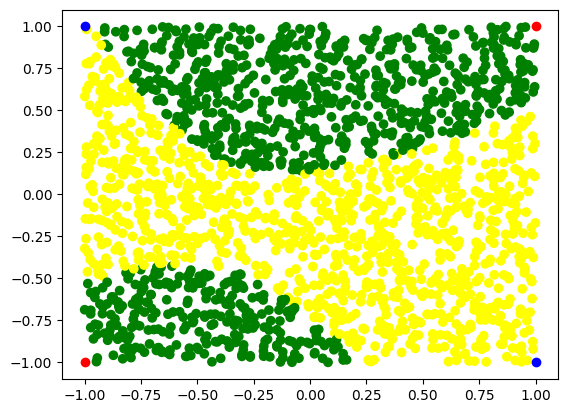

<Figure size 640x480 with 0 Axes>

In [37]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.delete_float_array.restype = None

In [35]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

X = np.array(X,dtype=ctypes.c_float)
Y = np.array(Y,dtype=ctypes.c_float)

In [36]:
X_flat = X.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y))(*Y)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [60]:
X_to_predict = []

for i in range(10000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(-1.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [64]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    1,  # number_of_classes : usize,
    7.5,  # gamma : f32,
    True,  # is_classification : bool,
    len(X),  # number_of_clusters : usize
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 1,))
print(len(rbf_trained_model))

10000


In [65]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

for y in rbf_trained_model :
    if y <= 0 :
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

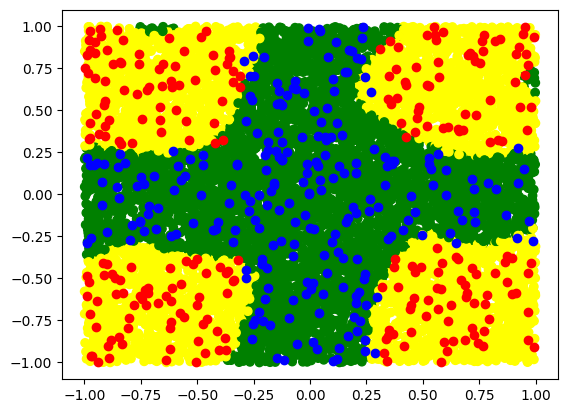

<Figure size 640x480 with 0 Axes>

In [66]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.delete_float_array.restype = None

In [68]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

X=np.array(X,dtype=ctypes.c_float)
Y=np.array(Y,dtype=ctypes.c_float)

In [69]:
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [70]:
X_to_predict = []

for i in range(10000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(-1.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [71]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    3,  # number_of_classes : usize,
    1,  # gamma : f32,
    True,  # is_classification : bool,
    len(X),  # number_of_clusters : usize
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 3,))
print(len(rbf_trained_model))

30000


In [72]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

# -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0
# -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0
# -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0

for j in range(0,len(rbf_trained_model)-2,3) :
    if rbf_trained_model[j] > rbf_trained_model[j+1] and rbf_trained_model[j] > rbf_trained_model[j+2] :
        predicted_labels.append('cyan')
    elif rbf_trained_model[j+1] > rbf_trained_model[j] and rbf_trained_model[j+1] > rbf_trained_model[j+2] :
        predicted_labels.append('purple')
    elif rbf_trained_model[j+2] > rbf_trained_model[j] and rbf_trained_model[j+2] > rbf_trained_model[j+1]:
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('green')

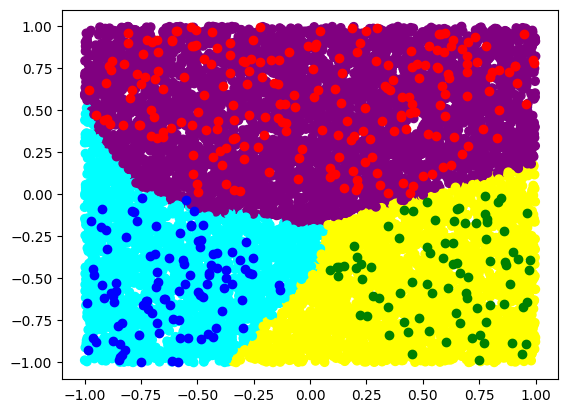

<Figure size 640x480 with 0 Axes>

In [73]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.delete_float_array.restype = None

In [75]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

x = np.array(X,dtype=ctypes.c_float)
Y = np.array(Y,dtype=ctypes.c_float)

In [76]:
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

In [103]:
X_to_predict = []

for i in range(5000):
    # x_1 = random.random() * 2 + 1
    x_1 = random.uniform(-1.0, 1.0)
    # x_2 = random.random() * 2 + 1
    x_2 = random.uniform(-1.0, 1.0)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [125]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    3,  # number_of_classes : usize,
    6.5,  # gamma : f32,
    True,  # is_classification : bool,
    len(X),  # number_of_clusters : usize
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 3,))
print(len(rbf_trained_model))

15000


In [126]:
predicted_labels = []
predicted_x_1 = []
predicted_x_2 = []

for i in range(len(X_to_predict_flat)) :
    if i%2 == 0 :
        predicted_x_1.append(X_to_predict_flat[i])
    else :
        predicted_x_2.append(X_to_predict_flat[i])

# Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X])

for j in range(0,len(rbf_trained_model)-2,3) :
    if rbf_trained_model[j] > rbf_trained_model[j+1] and rbf_trained_model[j] > rbf_trained_model[j+2] :
        predicted_labels.append('cyan')
    elif rbf_trained_model[j+1] > rbf_trained_model[j] and rbf_trained_model[j+1] > rbf_trained_model[j+2] :
        predicted_labels.append('purple')
    elif rbf_trained_model[j+2] > rbf_trained_model[j] and rbf_trained_model[j+2] > rbf_trained_model[j+1]:
        predicted_labels.append('yellow')
    else :
        predicted_labels.append('pink')

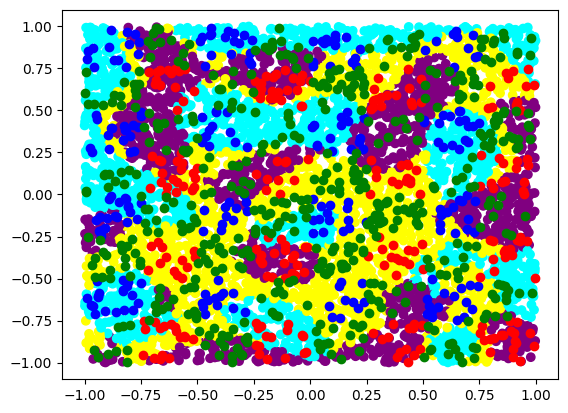

<Figure size 640x480 with 0 Axes>

In [127]:
plt.scatter(predicted_x_1, predicted_x_2, c=predicted_labels)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

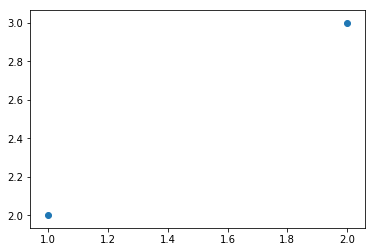

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

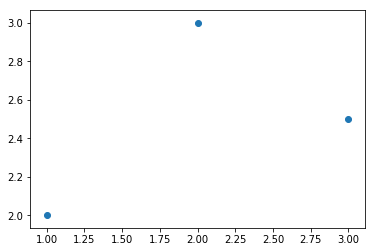

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [17]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

In [24]:
print(X[:,0])
print(X[:,1])

[1 2 3]
[1 2 1]


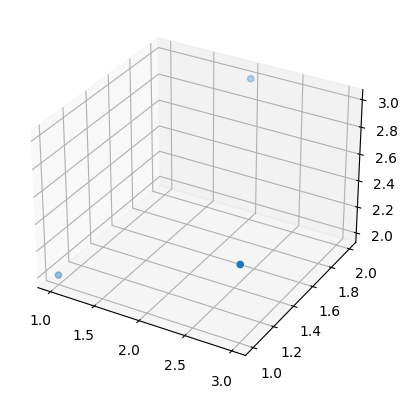

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
# plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [5]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [7]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>